In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
repo_spec = pd.read_csv('https://raw.githubusercontent.com/argo-marketplace/future_of_california/cusp_winter_18-19/CA_data_collaborations/gov_repo_spec.csv')
repo_count = pd.read_csv('https://raw.githubusercontent.com/argo-marketplace/future_of_california/cusp_winter_18-19/CA_data_collaborations/gov_repo_count.csv')

In [3]:
repo_count = repo_count.drop('Unnamed: 0', axis=1).dropna()
repo_spec = repo_spec.drop('Unnamed: 0', axis=1).dropna()
repo_count['log_count'] = np.log(repo_count['repo_count'])

In [4]:
repo_count.head()

,government_name,repo_count,log_count
0,argentina,5,1.609438
1,australia,41,3.713572
2,belgium,6,1.791759
3,bolivia,2,0.693147
4,brazil,31,3.433987


In [5]:
repo_spec.head()

,Country/Division,RepoName,Language,Contributors
0,argob,accesibilidad-web,HTML,3.0
1,argob,api-gateway-php,PHP,1.0
2,argob,AR-Distro,PHP,10.0
3,argob,barra-de-accesibilidad,PHP,1.0
4,argob,cofra,PHP,3.0


# Bar chart for repo of each org/gov

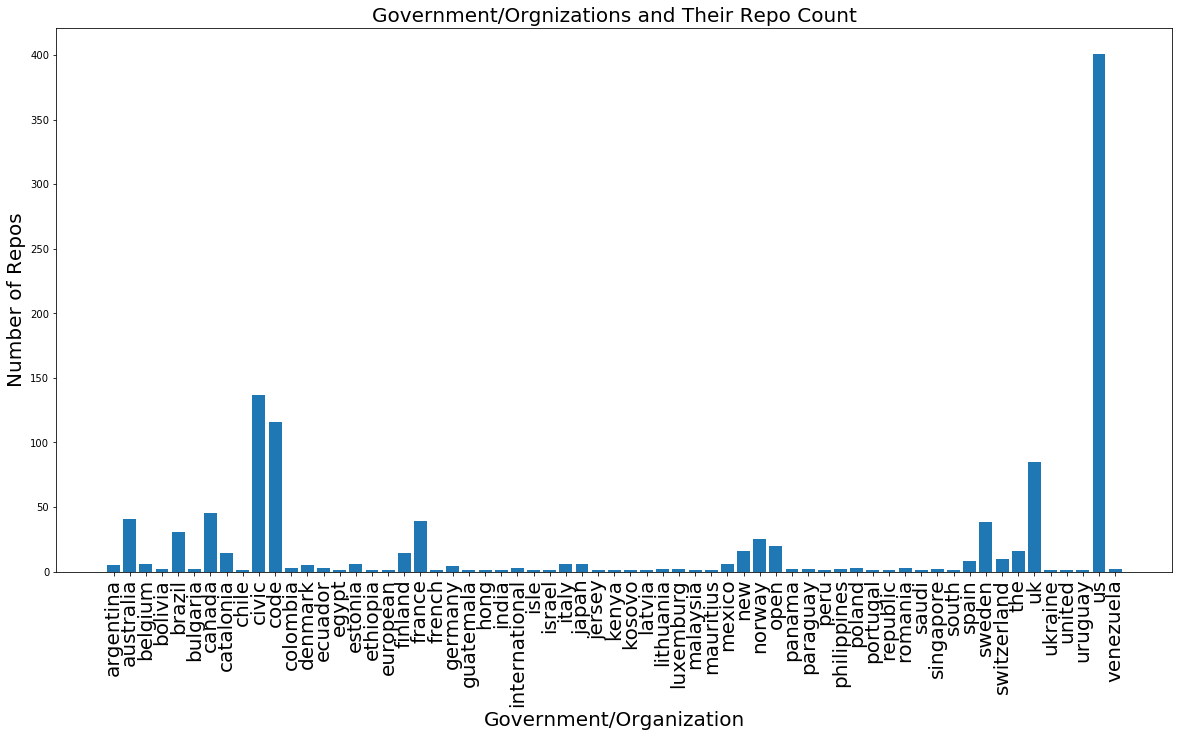

In [6]:
fig = plt.figure(figsize=(20,10))
plt.bar(left=np.arange(len(repo_count)), height=repo_count['repo_count'])
plt.title('Government/Orgnizations and Their Repo Count', fontsize=20)
plt.xticks(np.arange(len(repo_count)), repo_count['government_name'], fontsize=20, rotation=90)
plt.xlabel("Government/Organization", fontsize=20)
plt.ylabel("Number of Repos", fontsize=20)

# Ten org/gov with the most repos

In [7]:
top_count = repo_count.sort_values(by='repo_count', ascending=True, kind='mergesort')[-10:]
top_count.index = range(10)

In [8]:
top_count.head(10)

,government_name,repo_count,log_count
0,norway,25,3.218876
1,brazil,31,3.433987
2,sweden,38,3.637586
3,france,39,3.663562
4,australia,41,3.713572
5,canada,45,3.806662
6,uk,85,4.442651
7,code,116,4.753590
8,civic,137,4.919981
9,us,401,5.993961


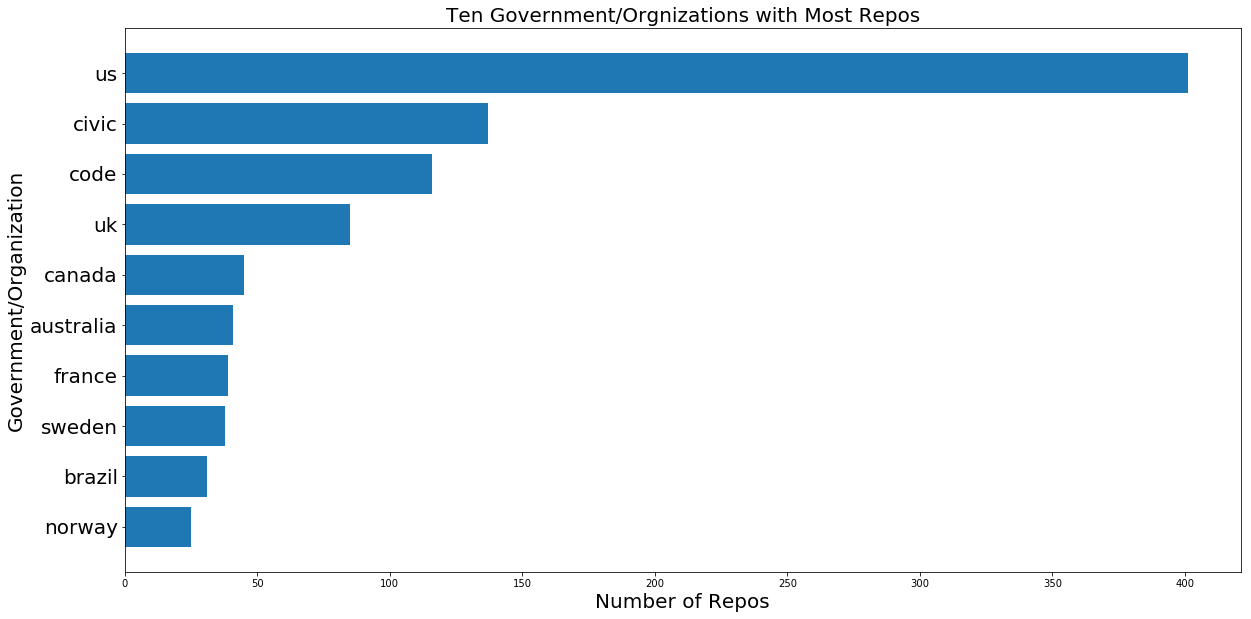

In [9]:
fig = plt.figure(figsize=(20,10))
plt.barh(bottom=np.arange(len(top_count)), width=top_count['repo_count'])
plt.title('Ten Government/Orgnizations with Most Repos', fontsize=20)
plt.yticks(np.arange(len(top_count)), top_count['government_name'], fontsize=20)
plt.ylabel("Government/Organization", fontsize=20)
plt.xlabel("Number of Repos", fontsize=20)

# Languages used in different repos

In [10]:
lang_freq = repo_spec[['Language','Contributors']].groupby('Language', as_index=False).count().\
                rename(columns={'Contributors': 'Count'})

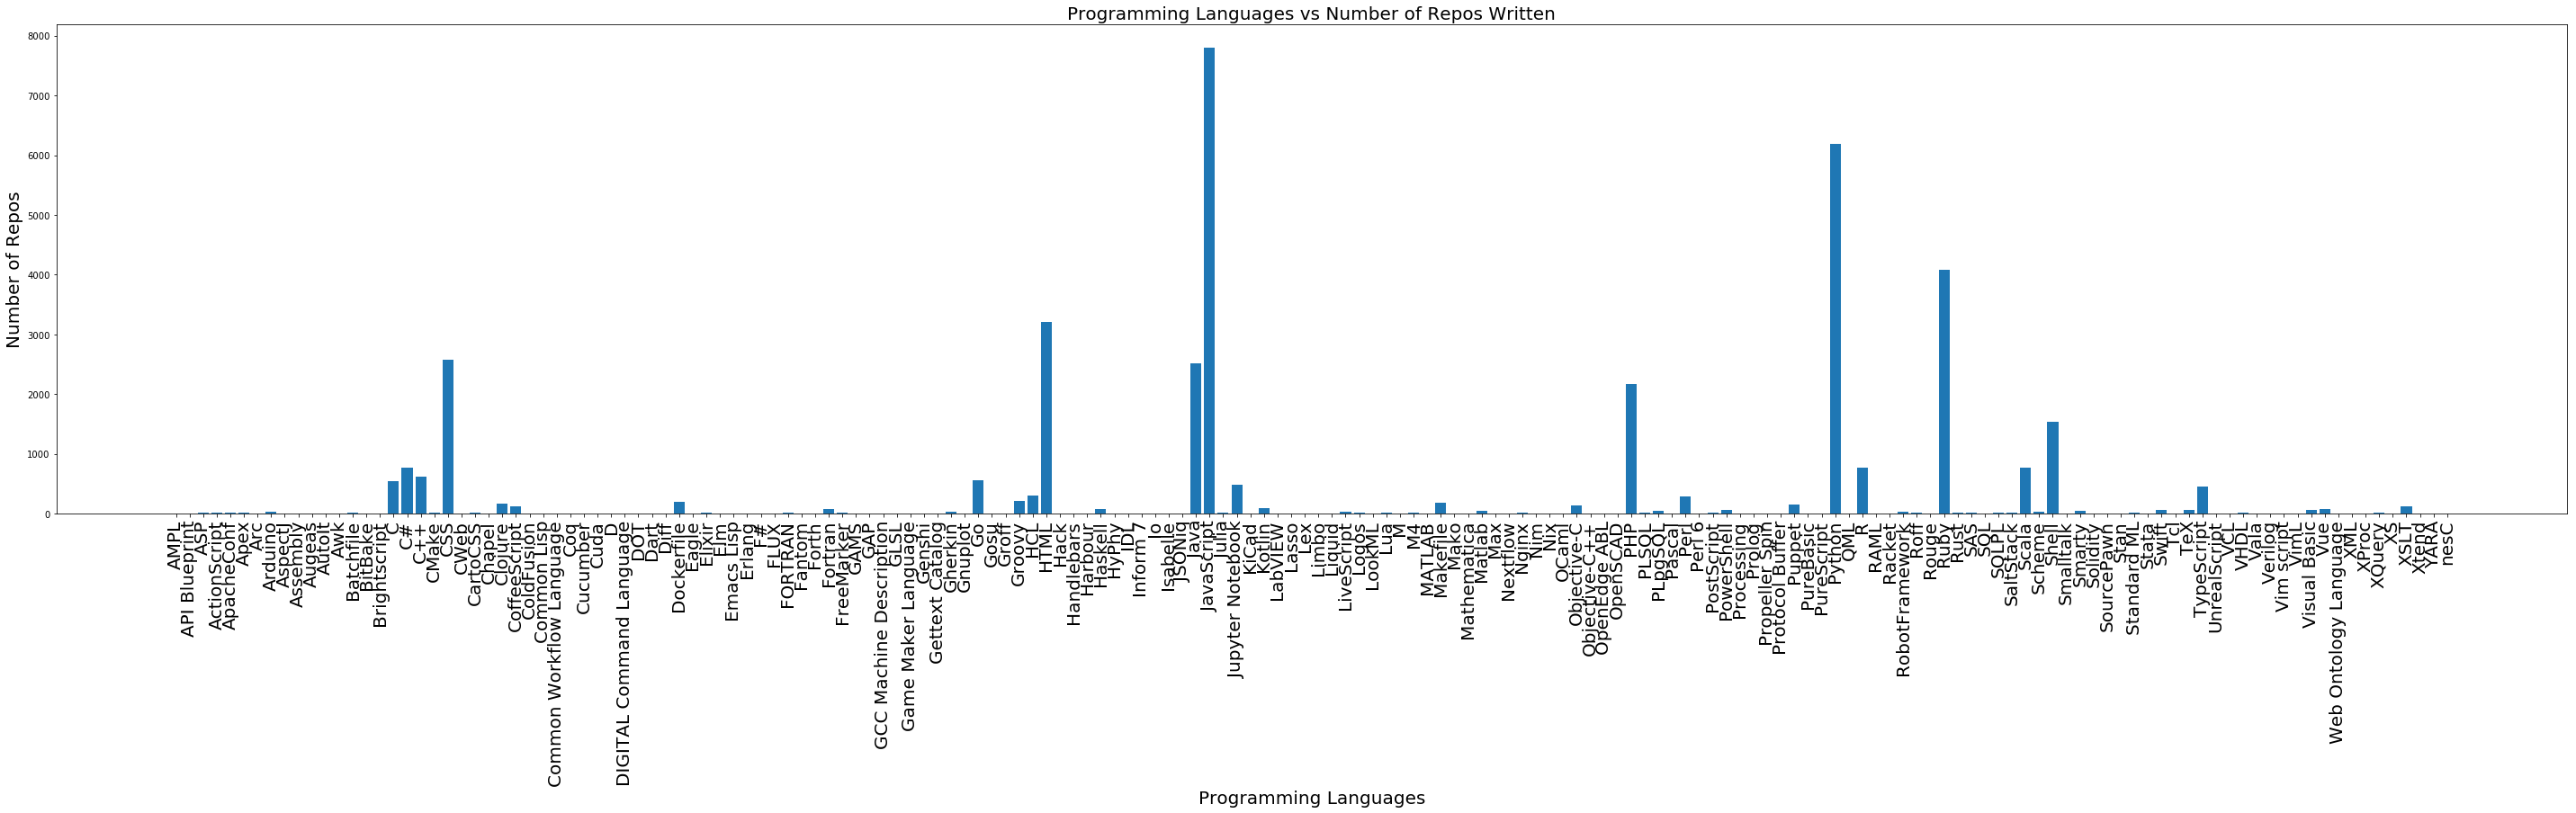

In [11]:
fig = plt.figure(figsize=(50,10))
plt.bar(left=np.arange(len(lang_freq)), height=lang_freq['Count'])
plt.title('Programming Languages vs Number of Repos Written', fontsize=20)
plt.xticks(np.arange(len(lang_freq)), lang_freq['Language'], fontsize=20, rotation=90)
plt.xlabel("Programming Languages", fontsize=20)
plt.ylabel("Number of Repos", fontsize=20)

# Top ten most used programming languages

In [12]:
top_lang = lang_freq.sort_values(by='Count', ascending=True, kind='mergesort')[-10:]
top_lang.index = range(10)

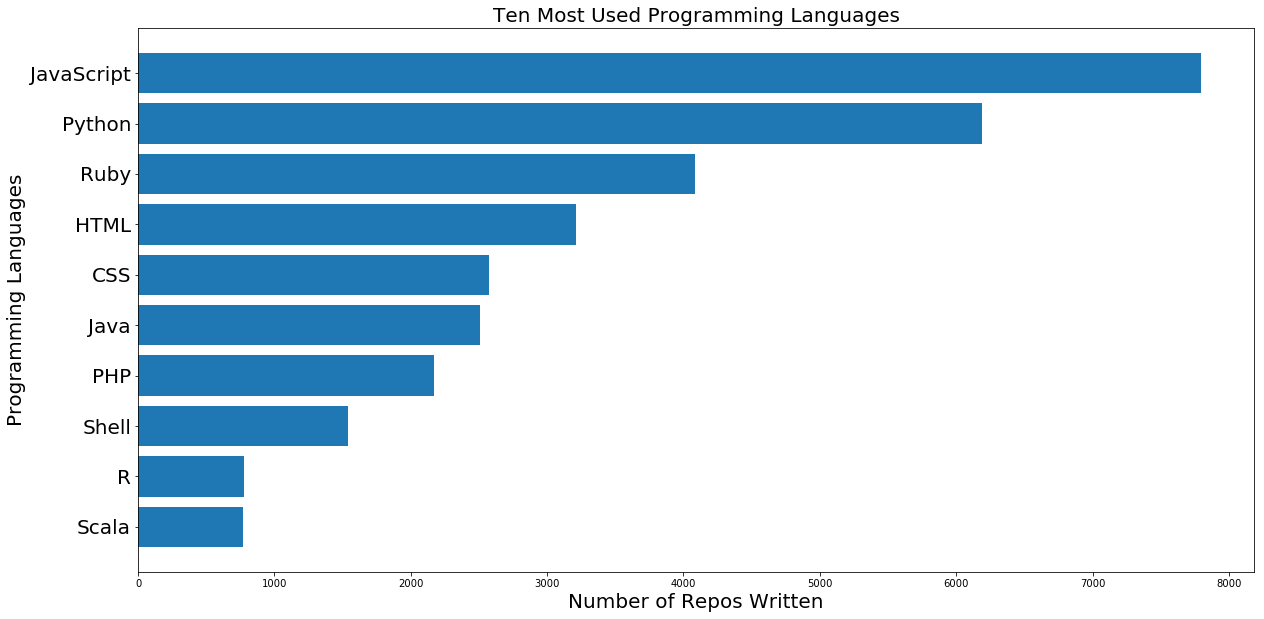

In [13]:
fig = plt.figure(figsize=(20,10))
plt.barh(bottom=np.arange(len(top_lang)), width=top_lang['Count'])
plt.title('Ten Most Used Programming Languages', fontsize=20)
plt.yticks(np.arange(len(top_lang)), top_lang['Language'], fontsize=20)
plt.ylabel("Programming Languages", fontsize=20)
plt.xlabel("Number of Repos Written", fontsize=20)

# Contributors per org

In [14]:
avg_con = repo_spec[['Country/Division','Contributors']].groupby('Country/Division', as_index=False).sum()
avg_con.head()

,Country/Division,Contributors
0,18f,8105.0
1,6Aika,438.0
2,ANSSI-FR,63.0
3,ARM-DOE,47.0
4,AZMAG,50.0


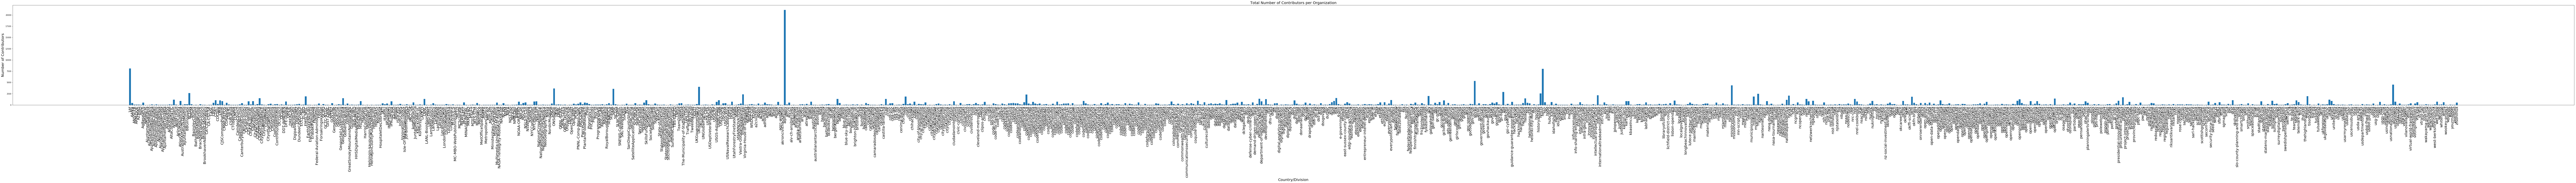

In [15]:
fig = plt.figure(figsize=(250,10))
plt.bar(left=np.arange(len(avg_con)), height=avg_con['Contributors'])
plt.title('Total Number of Contributors per Organization', fontsize=20)
plt.xticks(np.arange(len(avg_con)), avg_con['Country/Division'], fontsize=20, rotation=90)
plt.xlabel("Country/Division", fontsize=20)
plt.ylabel("Number of Contributors", fontsize=20)

# Repos with the most contributors

In [16]:
repo_grp = repo_spec[['RepoName', 'Contributors']].groupby('RepoName', as_index=False).sum()
repo_con = repo_grp.sort_values(by='Contributors', ascending=True, kind='mergesort')[-10:]
repo_con.index = range(len(repo_con))

In [17]:
repo_con.head(10)

,RepoName,Contributors
0,puppetlabs-postgresql,497.0
1,openshift-ansible,506.0
2,bootstrap,565.0
3,helm,780.0
4,DefinitelyTyped,787.0
5,docker,880.0
6,swagger-ui,927.0
7,charts,1273.0
8,ckan,2725.0
9,government.github.com,3450.0


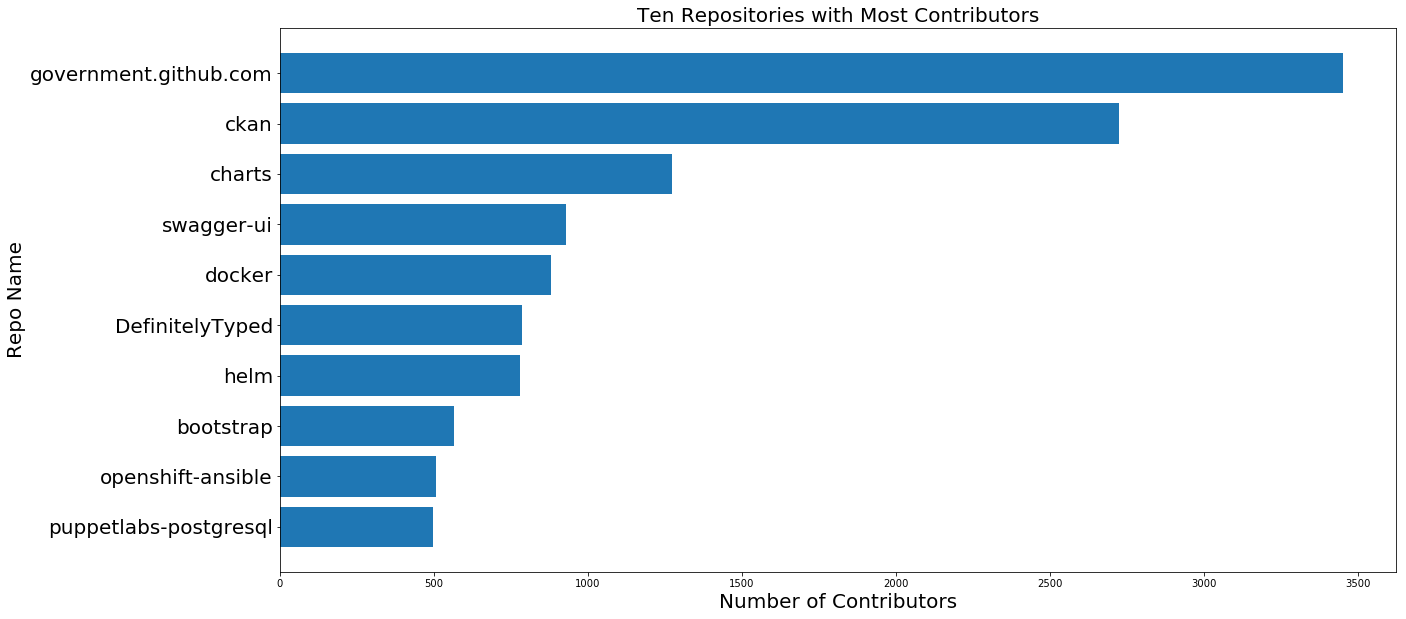

In [18]:
fig = plt.figure(figsize=(20,10))
plt.barh(bottom=np.arange(len(repo_con)), width=repo_con['Contributors'])
plt.title('Ten Repositories with Most Contributors', fontsize=20)
plt.yticks(np.arange(len(repo_con)), repo_con['RepoName'], fontsize=20)
plt.ylabel("Repo Name", fontsize=20)
plt.xlabel("Number of Contributors", fontsize=20)